In [213]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Image
import scipy.ndimage
import glob

In [214]:
cd ~/Documents/projects/phylab/elegans/data/exp1/trial2/complete_data

/home/tushara/Documents/projects/phylab/elegans/data/exp1/trial2/complete_data


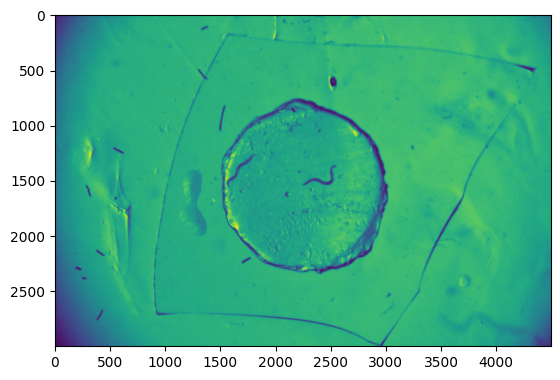

In [215]:
reference_img = cv2.imread("MA2_0001.JPG", 0) # do not change
plt.imshow(reference_img)
plt.show()

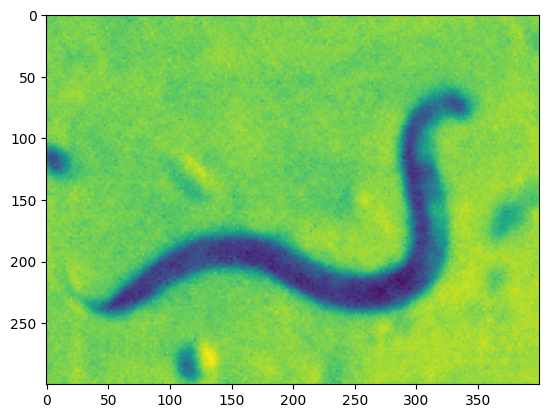

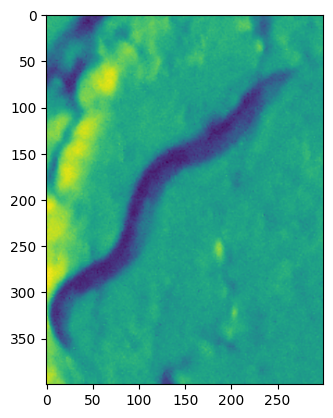

In [216]:
worm1 = reference_img[1300:1600, 2200:2600] # taken for reference -- the dimension of the worm in this image is assumed to be the same for the worms in all the images. The coordinates are chosen to focus on the worm and obtain specifically its contour dimensions. 
worm2 = reference_img[1200:1600, 1550:1850]
plt.imshow(worm1)
plt.show()
plt.imshow(worm2)
plt.show()

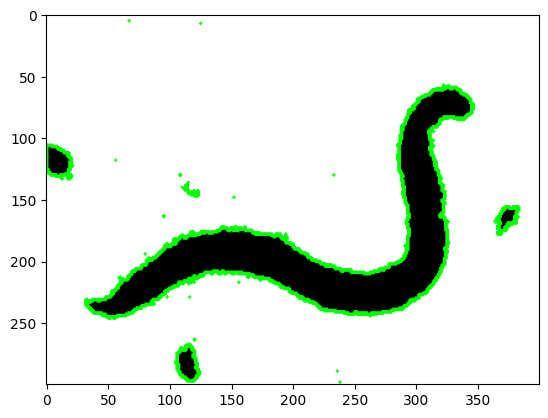

In [217]:
# reference for worm 1
ret, bin_worm1 = (cv2.threshold(worm1, 110, 255, cv2.THRESH_BINARY))
bin_worm1 = np.uint8(~scipy.ndimage.binary_fill_holes(~bin_worm1))*255
worm1_contour, hierarchy = cv2.findContours(cv2.bitwise_not(bin_worm1), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
worm1_area = cv2.contourArea(max(worm1_contour, key=cv2.contourArea))
worm1_length = len(max(worm1_contour, key=cv2.contourArea))
imgg = cv2.cvtColor(bin_worm1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imgg, worm1_contour, -1, (0,255,0), 2)
plt.imshow(imgg, cmap = "gray")
plt.show()
#print(worm1_length)
#print(worm1_area)

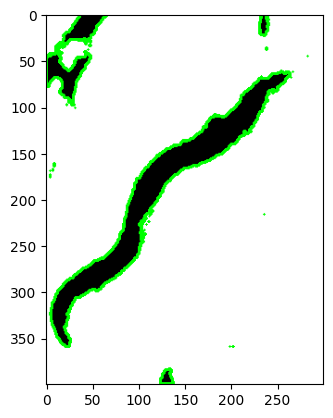

In [218]:
# reference for worm 2
ret, bin_worm2 = (cv2.threshold(worm2, 90, 255, cv2.THRESH_BINARY))
bin_worm2 = np.uint8(~scipy.ndimage.binary_fill_holes(~bin_worm2))*255
worm2_contour, hierarchy = cv2.findContours(cv2.bitwise_not(bin_worm2), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 
worm2_area = cv2.contourArea(max(worm2_contour, key=cv2.contourArea))
worm2_length = len(max(worm2_contour, key=cv2.contourArea))
imgg = cv2.cvtColor(bin_worm2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(imgg, worm2_contour, -1, (0,255,0), 2)
plt.imshow(imgg, cmap = "gray")
plt.show()
#print(worm2_length)
#print(worm2_area)

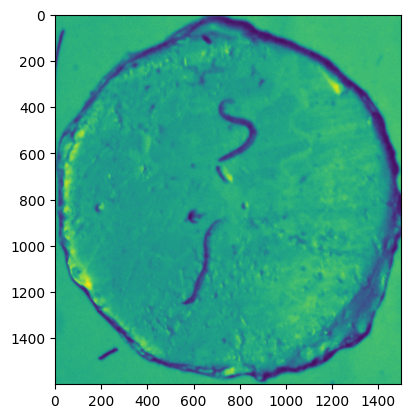

In [324]:
img = cv2.imread("MA2_0120.JPG", 0) 
cell = img[750:2350, 1500:3000] 
plt.imshow(cell)
plt.show()

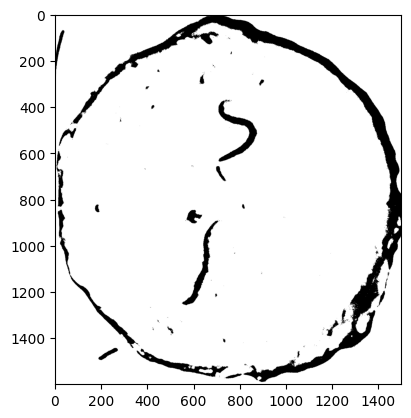

In [325]:
ret, bin_cell = (cv2.threshold(cell, 80, 255, cv2.THRESH_BINARY))
#bin_cell = np.uint8(~scipy.ndimage.binary_fill_holes(~bin_cell))*255
plt.imshow(bin_cell, cmap = "gray")
plt.show()

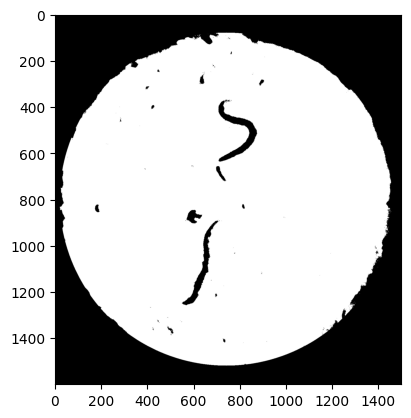

In [326]:
mask = np.zeros_like(bin_cell)
radius = 720 # the radius of the mask cell that i am taking
cv2.circle(mask, (740,800), radius, 255, -1)
masked_cell = cv2.bitwise_and(bin_cell, mask)
plt.imshow(masked_cell, cmap = "gray")
plt.show()

In [327]:
contours, hierarchy = cv2.findContours(cv2.bitwise_not(masked_cell), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

tolerance = 0.5
min_area = np.average([worm1_area,worm2_area]) * (1-tolerance) 
max_area = np.average([worm1_area,worm2_area]) * (1+tolerance)

worms_contour = [c for c in contours if min_area <= cv2.contourArea(c) <= max_area]
c_worms = cv2.cvtColor(masked_cell, cv2.COLOR_GRAY2BGR)
cv2.drawContours(c_worms, worms_contour, -1, (0, 255, 0), 2)
print()

277.2002886001384


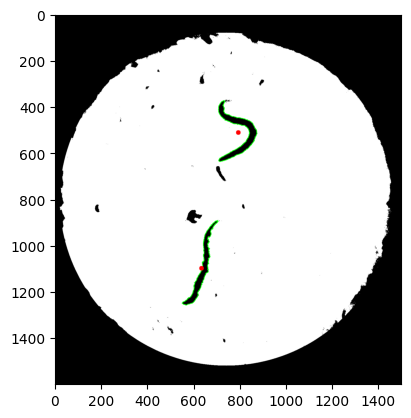

In [328]:
if len(worms_contour) == 2:
    center = []
    for i in range(len(worms_contour)):
        moments = cv2.moments(worms_contour[i])
        centers.append((int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])))
        cv2.circle(c_worms, centers[-1], 10, (255, 0, 0), -1)
    distance = math.dist(centers[0], centers[1])
    print(distance)
elif len(worms_contour) == 1: 
    moments = cv2.moments(worms_contour[0])
    center = (int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00']))
    cv2.circle(c_worms, center, 10, (255, 0, 0), -1)
    distance = radius
    print(distance)
    
plt.imshow(c_worms)
plt.show()

# note:
for this set of data (trial 2), when one of the worms goes to the boundary and gets lost, the distance is radius because the not-lost worm is at the center. But when both the worms get lost, the data is ignored be